In [4]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

In [1]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.

GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py

It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 200
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


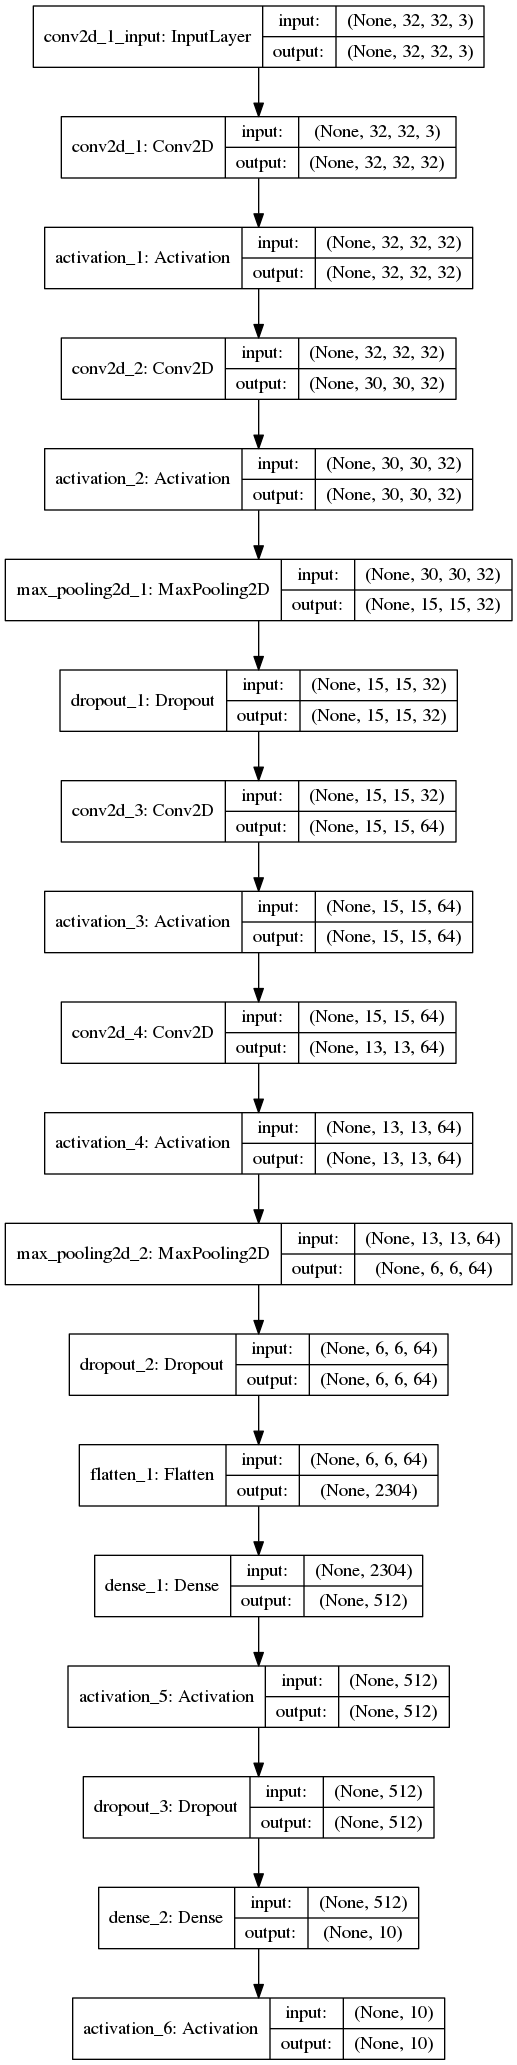

In [3]:
plot_model(model, to_file="cifer_test.png", show_shapes=True)
Image('cifer_test.png')

In [6]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.

GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py

It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
        
from keras.models import *
from keras.layers import *

batch_size = 32
num_classes = 10
epochs = 200
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#model = Sequential()

#model.add(Conv2D(32, (3, 3), padding='same',
                 #input_shape=x_train.shape[1:]))
#model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes))
#model.add(Activation('softmax'))

input_tensor = Input(x_train.shape[1:])
x = input_tensor

x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


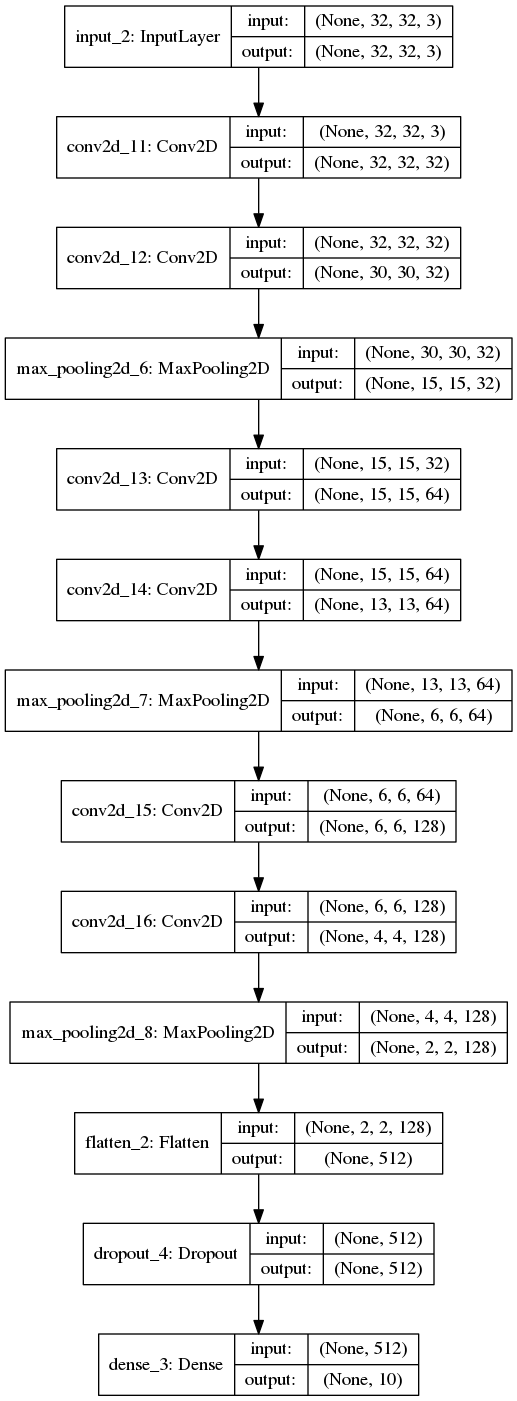

In [7]:
plot_model(model, to_file="cifer_test_v2.png", show_shapes=True)
Image('cifer_test_v2.png')

In [2]:
import cv2
import os
import numpy as np
import random
from generator import captcha_generator as gen
        
from keras.models import *
from keras.layers import *

chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy1234567890"
width, height, n_len, n_class = 140, 44, 6, len(chars)

input_tensor = Input((height, width, 3))
x = input_tensor
#for i in range(4):
    #x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    #x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    #x = MaxPooling2D((2, 2))(x)

#x = Conv2D(32, (5, 5), activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(64, (5, 5), activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(128, (5, 5), activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(256, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(n_len)]
model = Model(inputs=input_tensor, outputs=x)

sgd = optimizers.SGD(lr=0.1, decay=1e-2, momentum=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Using TensorFlow backend.


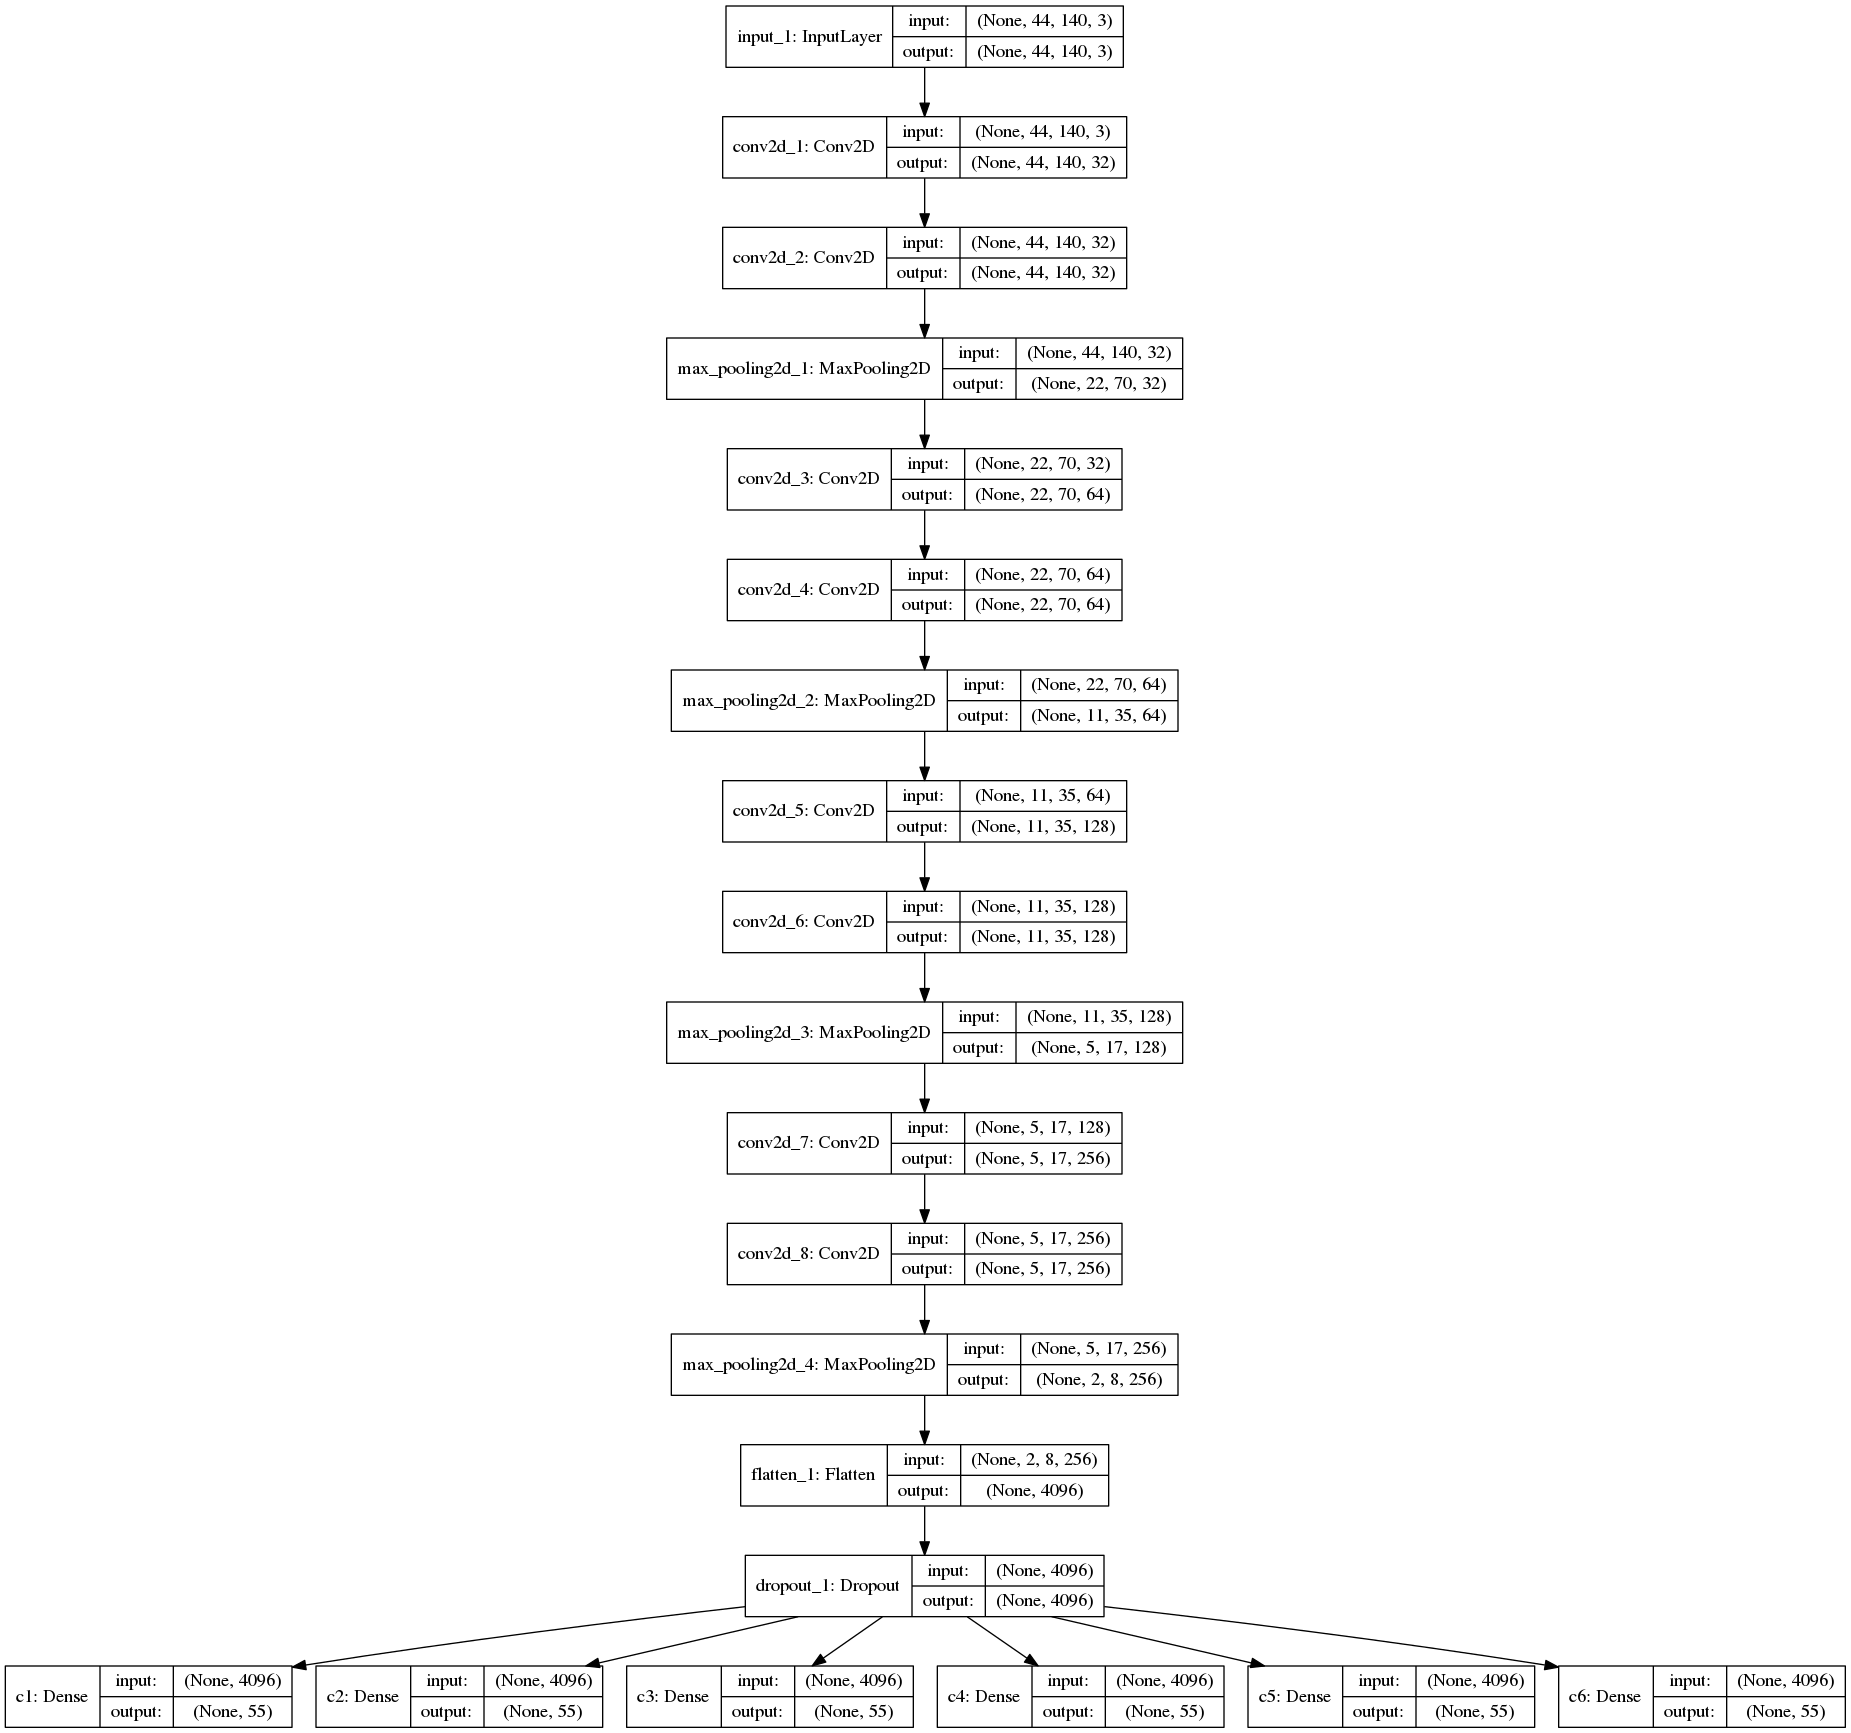

In [5]:
plot_model(model, to_file="captcha_break_v2_2.png", show_shapes=True)
Image('captcha_break_v2_2.png')